In [92]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [93]:
df = pd.read_csv('vectorized_data.zip')

In [94]:
df.columns

Index(['Polls ID', 'Poll Responses Response', 'Assessment reports Hashtag',
       'Assessment reports Score', 'time_stamp', 'tokenized_responses',
       'stemmed_responses', 'clean_responses', 'string', 'LOs/ HCs', 'College',
       'Course', 'flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'lex_data_prep', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 'vec',
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20'],
      dtype='object')

## Random sampling for grade class imbalance

In [95]:
sample_len = df[df['Assessment reports Score'] == 2].shape[0]

sample_3 = df[df['Assessment reports Score'] == 3].sample(n= sample_len)
sample_4 = df[df['Assessment reports Score'] == 4].sample(n= sample_len)

#concatenate the dataframes
df = pd.concat([df[df['Assessment reports Score'] == 2], sample_3, sample_4], axis=0)

In [96]:
# X exclude categorical data
X = df[['time_stamp','flesch_reading_ease', 'flesch_kincaid_grade', 'gunning_fog',
       'smog_index', 'automated_readability_index', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula', 'hdd', 'Summer', 'Dugast', 'words_count',
       'unique_words', 'ttr', 'rttr', 'cttr', 'mtld', 'herdan', 'maas', 
       'vec_1', 'vec_2', 'vec_3', 'vec_4', 'vec_5', 'vec_6', 'vec_7', 'vec_8',
       'vec_9', 'vec_10', 'vec_11', 'vec_12', 'vec_13', 'vec_14', 'vec_15',
       'vec_16', 'vec_17', 'vec_18', 'vec_19', 'vec_20']]
y = df['Assessment reports Score']

In [97]:
len(X.columns)

40

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [99]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [100]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
feature_tables = pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=X.columns).T
feature_tables 

,0
time_stamp,0.019724
flesch_reading_ease,0.004359
flesch_kincaid_grade,0.028052
gunning_fog,0.004493
smog_index,0.000000
automated_readability_index,0.107133
coleman_liau_index,0.010256
dale_chall_readability_score,0.006840
linsear_write_formula,0.441932
hdd,0.005778


In [102]:
y_pred = regressor.predict(X_test)

In [103]:
mean_squared_error(y_test, y_pred)

0.5853388689403878

In [104]:
predictions = [round(value) for value in y_pred]

In [105]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 36.94%


In [106]:
train_score = classification_report(y_test, predictions)
print(train_score)

              precision    recall  f1-score   support

           2       0.66      0.13      0.22      5260
           3       0.34      0.93      0.50      5239
           4       0.68      0.05      0.10      5329

    accuracy                           0.37     15828
   macro avg       0.56      0.37      0.27     15828
weighted avg       0.56      0.37      0.27     15828



## Cross validation

In [107]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(regressor, X, y, cv=kf)

In [108]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.131
Fold 2: 0.129
Fold 3: 0.128
Fold 4: 0.138
Fold 5: 0.142
Overall Accuracy: 0.134 (+/- 0.011)


## PCA

### Apply feature scaling 

In [109]:
# copying the data
X_copy = X.copy()
columns = X_copy.columns

In [110]:
# Apply feature scaling 
scaler = StandardScaler()
X_copy = scaler.fit_transform(X_copy)
X_copy = pd.DataFrame(X_copy, columns= columns)
X_copy.head()

,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,hdd,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
0,-1.596855,1.681525,-1.716598,-2.088466,0.0,-0.848808,0.988508,0.108843,-1.713971,0.693701,...,1.455138,0.977094,-0.081489,0.269089,2.480677,0.381014,1.020641,0.594015,0.701621,-0.735958
1,-1.596855,0.801229,-1.258607,-1.756703,0.0,-0.942051,0.772169,-0.282012,-1.455378,-0.148078,...,1.193172,0.945147,1.280142,0.070542,1.359181,-0.709344,1.056955,2.130848,1.545231,1.228331
2,-1.596855,1.610768,-2.035200,-1.709025,0.0,-1.750156,-0.071553,-0.601802,-1.778619,0.623937,...,1.010290,-0.319886,-0.026773,-0.678062,0.612920,-1.734491,-0.017878,-0.425685,1.540308,0.046222
3,-1.596855,2.279834,-2.194501,-1.949404,0.0,-1.734616,-0.788562,-1.875041,-1.649322,0.768245,...,0.485545,0.339753,-0.493202,-1.391971,-0.624367,-2.129802,0.524900,-1.648274,0.650528,-0.618960
4,-1.596634,1.100384,-0.860354,-0.987889,0.0,-0.537998,-0.247715,0.322036,-0.744249,0.243083,...,0.404438,-0.001575,-0.975516,-0.603567,0.609765,-0.495550,1.004108,1.900446,0.615316,-0.753836


Text(0.5, 1.0, 'PCA cumulative explained variance')

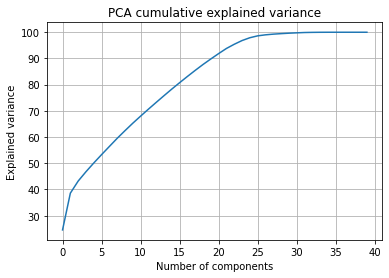

In [111]:
import numpy as np
from sklearn.decomposition import PCA
# Use 100 components to see explained variance 
pca_40 = PCA(n_components = 40)
pca_40.fit(X_copy)

plt.grid()
plt.plot(np.cumsum(pca_40.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')

In [112]:
#Explained variance ratio with numbers of components

import pandas as pd
explained_var = np.cumsum(pca_40.explained_variance_ratio_ * 100).reshape(-1, 1)
num_comps = [i+1 for i in range(40)]
explained_var
explained_var_df = pd.DataFrame(explained_var,index=num_comps, columns = ['Explained Variance Ratio'])
explained_var_df

,Explained Variance Ratio
1,24.563624
2,38.583101
3,43.194690
4,46.764352
5,50.098027
6,53.291544
7,56.409166
8,59.512485
9,62.431913
10,65.279696


In [113]:
def pca_results(full_dataset, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    
    #use the number of componenets to create dimensions 
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # use PCA components to create a dataframe: columns = variables, rows = component values
    components = pd.DataFrame(np.round(pca.components_, 4), columns = full_dataset.columns)
    components.index = dimensions#change index to dimensions 
    
    # PCA explained variance 
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    #make explained variance into a column format
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    return pd.concat([variance_ratios, components], axis = 1) #put explained variance and component df together 


def pca_plot(pca_results_df , nth_component):
    
    explain_variance = pca_results_df['Explained Variance'][:nth_component]
    accu_explain_variance = np.round(explain_variance.sum(),4)

    
    sort_comp = pca_results_df.iloc[nth_component-1, 1:].sort_values()
    head = sort_comp[:5]  #largest five variables in a component
    tail = sort_comp[-5:] #smallest five variables in a component
    components = pd.concat([head, tail])
    
    # Plot the components 
    components.plot(kind='bar', title='Component ' + str(nth_component), color = 'c')
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)

    plt.show()
    print('Accumulative explained varaince for Component',nth_component,'is',accu_explain_variance)
    return components

In [114]:
pca_results_40 = pca_results(X, pca_40)
pca_results_40

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2456,-0.0266,0.2271,-0.2414,-0.2384,-0.0000,-0.2508,-0.1751,-0.1941,-0.2260,...,0.0285,-0.0327,0.0075,0.0313,-0.0032,-0.0382,0.0357,0.0453,-0.0941,0.0199
Dimension 2,0.1402,0.1107,-0.1852,0.2676,0.2584,-0.0000,0.2488,-0.0080,-0.0862,0.2843,...,-0.0194,-0.0207,-0.0126,0.0139,-0.0070,0.0237,-0.0246,0.0095,-0.0168,0.0086
Dimension 3,0.0461,-0.0343,-0.3195,0.0834,0.0091,0.0000,0.0538,0.4541,0.3391,-0.0169,...,-0.1128,0.3536,0.0151,0.1300,0.0610,0.0666,-0.1656,-0.0952,0.0005,-0.2057
Dimension 4,0.0357,-0.0133,0.0283,0.0008,0.0069,-0.0000,-0.0099,-0.0845,0.0187,0.0030,...,-0.1703,-0.1806,0.3911,0.2780,-0.0424,0.2095,-0.0579,0.1347,-0.2467,0.0694
Dimension 5,0.0333,0.0452,0.0175,-0.0149,-0.0156,-0.0000,-0.0106,-0.0078,0.0352,-0.0180,...,-0.0727,0.1195,-0.0086,-0.0570,0.0163,0.3559,-0.2925,0.0809,0.2895,-0.1000
Dimension 6,0.0319,0.3703,-0.0386,0.0141,-0.0001,0.0000,-0.0241,-0.0393,0.1188,-0.0090,...,-0.1417,-0.1127,0.1601,0.1457,-0.0722,0.3969,-0.0338,0.4406,0.0741,-0.0666
Dimension 7,0.0312,0.0278,0.0207,-0.0340,-0.0401,-0.0000,-0.0013,0.0834,-0.0473,-0.0373,...,0.1500,0.1115,0.0400,-0.1667,0.6157,0.0845,0.1333,-0.0110,0.3553,0.1586
Dimension 8,0.0310,0.0696,0.0165,0.0012,-0.0015,-0.0000,0.0051,-0.0263,0.0914,-0.0018,...,-0.2771,0.1922,0.2800,-0.0999,-0.2948,-0.0428,0.1497,-0.3222,-0.1672,0.0849
Dimension 9,0.0292,-0.1742,0.0110,-0.0066,-0.0123,-0.0000,-0.0018,-0.0007,0.0026,-0.0047,...,-0.2147,0.2021,0.1338,-0.1682,0.0658,-0.1775,-0.0044,0.2859,0.0806,0.3081
Dimension 10,0.0285,0.1701,0.0680,0.0030,0.0468,0.0000,-0.0219,-0.2043,0.0522,0.0400,...,-0.2768,-0.2858,-0.0307,0.1134,0.4533,-0.2714,-0.1865,-0.0830,-0.0523,-0.4779


In [115]:
pca_results_40.iloc[0]

Explained Variance              0.2456
time_stamp                     -0.0266
flesch_reading_ease             0.2271
flesch_kincaid_grade           -0.2414
gunning_fog                    -0.2384
smog_index                     -0.0000
automated_readability_index    -0.2508
coleman_liau_index             -0.1751
dale_chall_readability_score   -0.1941
linsear_write_formula          -0.2260
hdd                            -0.2629
Summer                         -0.2246
Dugast                         -0.1550
words_count                    -0.1935
unique_words                   -0.2736
ttr                            -0.1306
rttr                           -0.3056
cttr                           -0.3056
mtld                           -0.2405
herdan                         -0.2001
maas                            0.2399
vec_1                           0.0447
vec_2                           0.0036
vec_3                           0.0263
vec_4                          -0.0295
vec_5                    

In [116]:
#Reapply PCA with 25 components
pca_25 = PCA(25)
pca_features_25 = pca_25.fit_transform(X_copy)

In [117]:
print(pca_features_25.shape)
print(np.cumsum(pca_25.explained_variance_ratio_))

(63312, 25)
[0.24563624 0.38583101 0.4319469  0.46764352 0.50098027 0.53291544
 0.56409166 0.59512485 0.62431913 0.65279696 0.67982282 0.70639917
 0.7322975  0.75789043 0.78310614 0.80744079 0.83127257 0.85449833
 0.87694657 0.89806522 0.91852643 0.93811516 0.95408836 0.96828699
 0.9790385 ]


Text(0.5, 1.0, 'PCA cumulative explained variance')

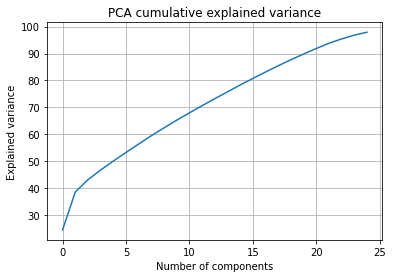

In [118]:
plt.grid()
plt.plot(np.cumsum(pca_25.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA cumulative explained variance')


In [119]:
pca_features_25

array([[ 2.86255615e-01, -5.31584337e+00,  6.15220877e-02, ...,
        -1.55355018e-01,  3.92044124e-02, -3.01778575e-01],
       [ 3.17547237e+00, -2.64491312e+00,  9.88380562e-01, ...,
        -8.66471591e-01,  1.32450803e-01, -2.76394418e-03],
       [ 1.87568347e+00, -5.43857557e+00, -1.34676147e-01, ...,
         3.83577384e-01, -2.28094236e-01,  2.74034830e-02],
       ...,
       [-5.18923567e+00, -1.07446459e+00, -5.96294189e-01, ...,
         8.56557063e-01, -1.61524025e-01,  2.30759752e-01],
       [ 1.23458821e+00, -8.89188843e-01, -3.02546312e-01, ...,
        -3.99392760e-01,  5.62106330e-01,  1.74466596e-01],
       [-5.02229863e+00, -3.90316872e-01,  7.10911693e-01, ...,
        -3.23588233e-01,  5.31414695e-01, -3.94582118e-01]])

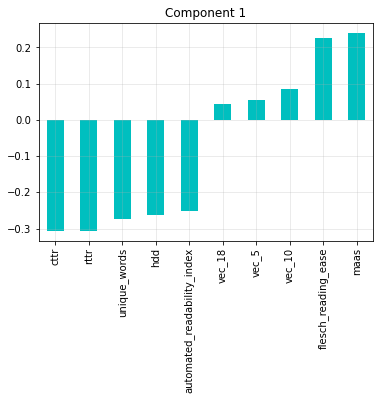

Accumulative explained varaince for Component 1 is 0.2456


cttr                          -0.3056
rttr                          -0.3056
unique_words                  -0.2736
hdd                           -0.2629
automated_readability_index   -0.2508
vec_18                         0.0453
vec_5                          0.0540
vec_10                         0.0865
flesch_reading_ease            0.2271
maas                           0.2399
Name: Dimension 1, dtype: float64

In [120]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25
pca_plot(pca_results_25, 1)

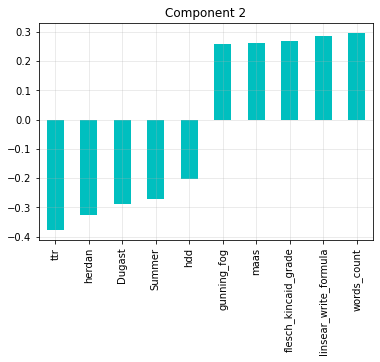

Accumulative explained varaince for Component 2 is 0.3858


ttr                     -0.3784
herdan                  -0.3242
Dugast                  -0.2880
Summer                  -0.2699
hdd                     -0.2022
gunning_fog              0.2584
maas                     0.2606
flesch_kincaid_grade     0.2676
linsear_write_formula    0.2843
words_count              0.2961
Name: Dimension 2, dtype: float64

In [121]:
pca_plot(pca_results_25, 2)

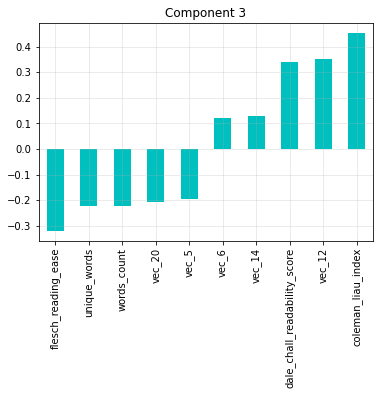

Accumulative explained varaince for Component 3 is 0.4319


flesch_reading_ease            -0.3195
unique_words                   -0.2240
words_count                    -0.2228
vec_20                         -0.2057
vec_5                          -0.1974
vec_6                           0.1230
vec_14                          0.1300
dale_chall_readability_score    0.3391
vec_12                          0.3536
coleman_liau_index              0.4541
Name: Dimension 3, dtype: float64

In [122]:
pca_plot(pca_results_25, 3)

In [123]:
#train test split
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(pca_features_25, y, test_size=0.20, random_state=123)

In [124]:
regressor_pca = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

regressor_pca.fit(X_train_pca, Y_train_pca)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [125]:
y_pred_pca = regressor_pca.predict(X_test_pca)

In [126]:
predictions_pca = [round(value) for value in y_pred_pca]

In [127]:
# evaluate predictions
accuracy = accuracy_score(Y_test_pca, predictions_pca)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 35.10%


In [128]:
train_score = classification_report(Y_test_pca, predictions_pca)
print(train_score)

              precision    recall  f1-score   support

           2       0.63      0.10      0.17      4212
           3       0.34      0.96      0.50      4197
           4       0.51      0.01      0.01      4254

    accuracy                           0.35     12663
   macro avg       0.49      0.35      0.23     12663
weighted avg       0.49      0.35      0.22     12663



In [129]:
mean_squared_error(Y_test_pca, predictions_pca)

0.6688778330569375

## Cross validation

In [133]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(regressor_pca, pca_features_25, y, cv=kf)

In [134]:
for fold, score in enumerate(scores):
    print(f'Fold {fold+1}: {score:.3f}')

# Print the overall accuracy
print(f'Overall Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Fold 1: 0.087
Fold 2: 0.088
Fold 3: 0.082
Fold 4: 0.091
Fold 5: 0.096
Overall Accuracy: 0.089 (+/- 0.010)


In [132]:
pca_results_25 = pca_results(X, pca_25)
pca_results_25

,Explained Variance,time_stamp,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,automated_readability_index,coleman_liau_index,dale_chall_readability_score,linsear_write_formula,...,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20
Dimension 1,0.2456,-0.0266,0.2271,-0.2414,-0.2384,-0.0,-0.2508,-0.1751,-0.1941,-0.2260,...,0.0285,-0.0327,0.0075,0.0313,-0.0032,-0.0382,0.0357,0.0453,-0.0941,0.0199
Dimension 2,0.1402,0.1107,-0.1852,0.2676,0.2584,-0.0,0.2488,-0.0080,-0.0862,0.2843,...,-0.0194,-0.0207,-0.0126,0.0139,-0.0070,0.0237,-0.0246,0.0095,-0.0168,0.0086
Dimension 3,0.0461,-0.0343,-0.3195,0.0834,0.0091,0.0,0.0538,0.4541,0.3391,-0.0169,...,-0.1128,0.3536,0.0151,0.1300,0.0610,0.0666,-0.1656,-0.0952,0.0005,-0.2057
Dimension 4,0.0357,-0.0133,0.0283,0.0008,0.0069,0.0,-0.0099,-0.0845,0.0187,0.0030,...,-0.1703,-0.1806,0.3911,0.2780,-0.0424,0.2095,-0.0579,0.1347,-0.2467,0.0694
Dimension 5,0.0333,0.0452,0.0175,-0.0149,-0.0156,0.0,-0.0106,-0.0078,0.0352,-0.0180,...,-0.0727,0.1195,-0.0086,-0.0570,0.0163,0.3559,-0.2925,0.0809,0.2895,-0.1000
Dimension 6,0.0319,0.3703,-0.0386,0.0141,-0.0001,-0.0,-0.0241,-0.0393,0.1188,-0.0090,...,-0.1417,-0.1127,0.1601,0.1457,-0.0722,0.3969,-0.0338,0.4406,0.0741,-0.0666
Dimension 7,0.0312,0.0278,0.0207,-0.0340,-0.0401,0.0,-0.0013,0.0834,-0.0473,-0.0373,...,0.1500,0.1115,0.0400,-0.1667,0.6157,0.0845,0.1333,-0.0110,0.3553,0.1586
Dimension 8,0.0310,0.0696,0.0165,0.0012,-0.0015,0.0,0.0051,-0.0263,0.0914,-0.0018,...,-0.2771,0.1922,0.2800,-0.0999,-0.2948,-0.0428,0.1497,-0.3222,-0.1672,0.0849
Dimension 9,0.0292,-0.1742,0.0110,-0.0066,-0.0123,-0.0,-0.0018,-0.0007,0.0026,-0.0047,...,-0.2147,0.2021,0.1338,-0.1682,0.0658,-0.1775,-0.0044,0.2859,0.0806,0.3081
Dimension 10,0.0285,0.1701,0.0680,0.0030,0.0468,0.0,-0.0219,-0.2043,0.0522,0.0400,...,-0.2768,-0.2858,-0.0307,0.1134,0.4533,-0.2714,-0.1865,-0.0830,-0.0523,-0.4779
